<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/SkimLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SkimLit

In [1]:
# Ki·ªÉm tra GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Nh·ªØng g√¨ ch√∫ng ta s·∫Ω ƒë·ªÅ c·∫≠p

Ch√∫ng ta s·∫Ω th·ª±c hi·ªán :

* Nh·∫≠n d·ªØ li·ªáu chu·ªói th·ªùi gian (gi√° l·ªãch s·ª≠ c·ªßa Bitcoin)
  * Load d·ªØ li·ªáu chu·ªói th·ªùi gian b·∫±ng m√¥-ƒëun CSV c·ªßa pandas/Python
* ƒê·ªãnh d·∫°ng d·ªØ li·ªáu cho b√†i to√°n chu·ªói th·ªùi gian
  * T·∫°o t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra (sai c√°ch)
  * T·∫°o t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra (ƒë√∫ng c√°ch)
  * Tr·ª±c quan h√≥a d·ªØ li·ªáu chu·ªói th·ªùi gian
  * Bi·∫øn d·ªØ li·ªáu chu·ªói th·ªùi gian th√†nh m·ªôt b√†i to√°n h·ªçc c√≥ gi√°m s√°t (windowing)
  * Chu·∫©n b·ªã d·ªØ li·ªáu ƒë∆°n bi·∫øn v√† ƒëa bi·∫øn (nhi·ªÅu h∆°n m·ªôt bi·∫øn)
* ƒê√°nh gi√° m√¥ h√¨nh d·ª± b√°o chu·ªói th·ªùi gian
* Thi·∫øt l·∫≠p m·ªôt chu·ªói c√°c th·ª≠ nghi·ªám m√¥ h√¨nh h·ªçc s√¢u
  * M·∫°ng d√†y ƒë·∫∑c (ƒë∆∞·ª£c k·∫øt n·ªëi ƒë·∫ßy ƒë·ªß)
  * M√¥ h√¨nh chu·ªói (LSTM v√† 1D CNN)
  * Ensembling (k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh v·ªõi nhau)
  * M√¥ h√¨nh ƒëa bi·∫øn
  * Sao ch√©p thu·∫≠t to√°n N-BEATS b·∫±ng c√°ch s·ª≠ d·ª•ng ph√¢n l·ªõp TensorFlow layer
* T·∫°o modelling checkpoint ƒë·ªÉ l∆∞u m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t trong qu√° tr√¨nh hu·∫•n luy·ªán
* ƒê∆∞a ra d·ª± ƒëo√°n (d·ª± b√°o) v·ªõi m√¥ h√¨nh chu·ªói th·ªùi gian
* T·∫°o kho·∫£ng th·ªùi gian d·ª± ƒëo√°n cho c√°c d·ª± b√°o m√¥ h√¨nh chu·ªói th·ªùi gian
* Th·∫£o lu·∫≠n v·ªÅ hai lo·∫°i kh√¥ng ch·∫Øc ch·∫Øn kh√°c nhau trong ML (data uncertainty v√† model uncertainty)
* Ch·ª©ng minh l√Ω do t·∫°i sao d·ª± b√°o trong m·ªôt h·ªá th·ªëng m·ªü l√† BS (b√†i to√°n g√† t√¢y)

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [3]:
# Ki·ªÉm tra xem c√≥ nh·ªØng file n√†o trong t·∫≠p d·ªØ li·ªáu PubMed_20K
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
# B·∫Øt ƒë·∫ßu s·ª≠ d·ª•ng t·∫≠p d·ªØ li·ªáu 20k
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
# Ki·ªÉm tra t·∫•t c·∫£ filename trong directory ƒë√≠ch
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [6]:
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [7]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
def preprocess_text_with_line_numbers(filename):
    input_lines = get_lines(filename)
    abstract_lines = ""
    abstract_samples = []
    for line in input_lines:
        if line.startswith("###"):
            abstract_id = line
            abstract_lines = ""
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split("\t")
                line_data["target"] = target_text_split[0]
                line_data["text"] = target_text_split[1].lower()
                line_data["line_number"] = abstract_line_number
                line_data["total_lines"] = len(abstract_line_split)
                abstract_samples.append(line_data)
        else:
            abstract_lines += line
    return abstract_samples

In [9]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev l√† m·ªôt t√™n g·ªçi kh√°c c·ªßa validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 864 ms, sys: 181 ms, total: 1.05 s
Wall time: 4.12 s


(180040, 30212, 30135)

In [10]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [11]:
# turn the dictionaries into pandas
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(10)

target                                               text  line_number  \
0  OBJECTIVE  to investigate the efficacy of @ weeks of dail...            0   
1    METHODS  a total of @ patients with primary knee oa wer...            1   
2    METHODS  outcome measures included pain reduction and i...            2   
3    METHODS  pain was assessed using the visual analog pain...            3   
4    METHODS  secondary outcome measures included the wester...            4   
5    METHODS  serum levels of interleukin @ ( il-@ ) , il-@ ...            5   
6    RESULTS  there was a clinically relevant reduction in t...            6   
7    RESULTS  the mean difference between treatment arms ( @...            7   
8    RESULTS  further , there was a clinically relevant redu...            8   
9    RESULTS  these differences remained significant at @ we...            9   

   total_lines  
0           12  
1           12  
2           12  
3           12  
4           12  
5           12  
6           12  
7           12  
8           12  
9           12

In [12]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

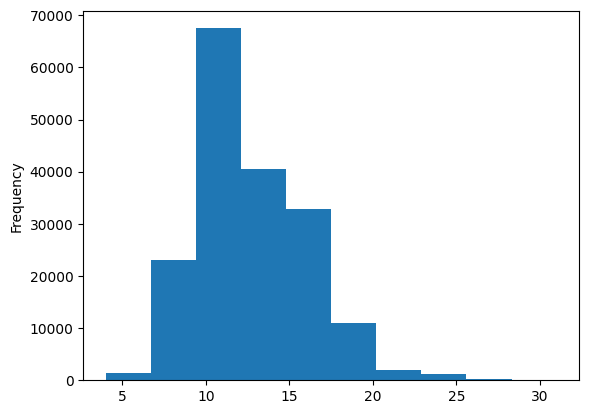

In [13]:
train_df.total_lines.plot.hist()

In [14]:
train_sentences = train_df.text.tolist()
val_sentences = val_df.text.tolist()
test_sentences = test_df.text.tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

## T·∫°o nh√£n d·∫°ng s·ªë (m√¥ h√¨nh h·ªçc m√°y c·∫ßn c√°c nh√£n d·∫°ng s·ªë)

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Ki·ªÉm tra xem c√°c nh√£n hu·∫•n luy·ªán tr√¥ng nh∆∞ th·∫ø n√†o
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
# Tr√≠ch xu·∫•t nh√£n (c·ªôt "target") v√† m√£ h√≥a ch√∫ng th√†nh s·ªë nguy√™n
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Ki·ªÉm tra xem nh√£n hu·∫•n luy·ªán tr√¥ng nh∆∞ th·∫ø n√†o
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [17]:
num_classes = len(label_encoder.classes_)
class_name = label_encoder.classes_
class_name, num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

## Model 0: T·∫°o m√¥ h√¨nh c∆° s·ªü
M√¥ h√¨nh ƒë·∫ßu ti√™n c·ªßa ch√∫ng ta s·∫Ω l√† TF-IDF Multinomial Naive Bayes, theo g·ª£i √Ω t·ª´ [machine learning map c·ªßa Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

ƒê·ªÉ x√¢y d·ª±ng, ch√∫ng ta s·∫Ω t·∫°o `Pipeline` c·ªßa Scikit-Learn, s·ª≠ d·ª•ng l·ªõp [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) ƒë·ªÉ chuy·ªÉn ƒë·ªïi c√°c c√¢u abstract th√†nh s·ªë b·∫±ng c√°ch s·ª≠ d·ª•ng thu·∫≠t to√°n TF-IDF, sau ƒë√≥ t√¨m hi·ªÉu c√°ch ph√¢n lo·∫°i c√°c c√¢u b·∫±ng c√°ch s·ª≠ d·ª•ng thu·∫≠t to√°n [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create the pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])
# fir the model pipeline
model_0.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
model_0.score(train_sentences, train_labels_encoded)

0.7516829593423684

In [20]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
# downlaod support functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-31 13:27:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‚Äòhelper_functions.py‚Äô

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-31 13:27:35 (77.6 MB/s) - ‚Äòhelper_functions.py‚Äô saved [10246/10246]



In [22]:
from helper_functions import calculate_results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Chu·∫©n b·ªã d·ªØ li·ªáu cho c√°c m√¥ h√¨nh chu·ªói s√¢u


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [24]:
# find the average length of the sentences
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

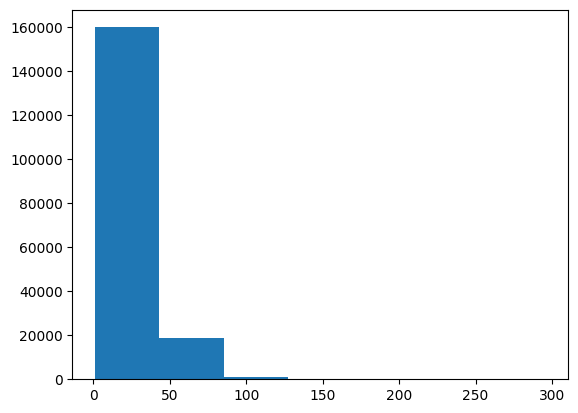

In [25]:
# plot the distribution ""
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [26]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [27]:
max(sent_lens)

296

In [28]:
max_tokens = 68000

In [29]:
# create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=55)

In [30]:
text_vectorizer.adapt(train_sentences)

In [31]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}\n")
print(f"Vectorized: {text_vectorizer([target_sentence])}")


Text:
meat provides several nutrients identified as important in maintaining immune function and lean body mass .

Vectorized: [[5193  828  881 8016  526   25  430    5 2278  988  149    3 2880  239
   385    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [32]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Top 5 words: {rct_20k_text_vocab[:5]}")
print(f"Bottom 5 words: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Top 5 words: ['', '[UNK]', 'the', 'and', 'of']
Bottom 5 words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:
# T√¨m c·∫•u h√¨nh c·ªßa text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [34]:
# create token embedding layer
token_embed = layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim=128,
    mask_zero=True,
    name="token_embedding" )

# print the embeddings
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization:\n{vectorized_sentence}\n")
print(f"Output shape: {token_embed(vectorized_sentence).shape}")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Embedded sentence:\n{embedded_sentence}")

Sentence before vectorization:
meat provides several nutrients identified as important in maintaining immune function and lean body mass .

Sentence after vectorization:
[[5193  828  881 8016  526   25  430    5 2278  988  149    3 2880  239
   385    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Output shape: (1, 55, 128)
Embedded sentence:
[[[ 0.0412592  -0.00747684  0.01050017 ... -0.02575753  0.0453539
   -0.01693344]
  [ 0.02389891  0.04667172  0.02756676 ... -0.04503064 -0.02846773
    0.020951  ]
  [ 0.04462652 -0.04876567  0.02254933 ...  0.02287556 -0.03281838
   -0.03673242]
  ...
  [-0.02546455 -0.02143897 -0.00472969 ...  0.01708739  0.01288802
   -0.01032957]
  [-0.02546455 -0.02143897 -0.00472969 ...  0.01708739  0.01288802
   -0.01032957]
  [-0.02546455 -0.02143897 -0.00472969 ...  0.01708739  0.01288802
   -0.01032

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [36]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE )
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D v·ªõi token embedding

In [37]:
# create conv1f model for sequential processing
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(filters=64, kernel_size=5,padding="same",activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs,name="model_1_conv1d")

In [38]:
#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.summary()

Model: "model_1_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                    

In [39]:
# fit the model with 10% of dataset
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=5,
                              validation_data=val_dataset,
                              validation_steps=int(0.1*len(val_dataset)))


Epoch 1/5
562/562 [==============================] - 75s 131ms/step - loss: 0.9134 - accuracy: 0.6378 - val_loss: 0.6851 - val_accuracy: 0.7380
Epoch 2/5
562/562 [==============================] - 70s 125ms/step - loss: 0.6560 - accuracy: 0.7568 - val_loss: 0.6347 - val_accuracy: 0.7683
Epoch 3/5
562/562 [==============================] - 70s 124ms/step - loss: 0.6156 - accuracy: 0.7736 - val_loss: 0.5971 - val_accuracy: 0.7846
Epoch 4/5
562/562 [==============================] - 69s 122ms/step - loss: 0.5877 - accuracy: 0.7889 - val_loss: 0.5795 - val_accuracy: 0.7869
Epoch 5/5
562/562 [==============================] - 69s 122ms/step - loss: 0.5899 - accuracy: 0.7909 - val_loss: 0.5614 - val_accuracy: 0.7975


In [40]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5601 - accuracy: 0.8007


[0.5601013898849487, 0.8006752133369446]

In [41]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:10]

945/945 [==============================] - 5s 5ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 2, 2, 2, 4, 1])>

In [42]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 80.06752283860718,
 'precision': 0.8009830254972893,
 'recall': 0.8006752283860717,
 'f1': 0.7974470564497274}

In [43]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [44]:
# random embdeeing
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence}\n")
print(f"Output shape: {use_embedded_sentence.shape}")

Random training sentence:
our findings showed that early initiation of crrt is associated with favorable clinical outcomes in ards patients , which might be due to the reduced serum and balf tgf-@ levels through crrt .

Sentence after embedding:
[[-6.63379133e-02  2.33501643e-02 -1.39552057e-02 -2.48290617e-02
   3.21764089e-02  5.12809604e-02 -3.13679166e-02 -6.03649169e-02
   4.25038971e-02  4.95154671e-02  8.87214392e-02  1.17802608e-03
  -5.15942276e-03  7.34766573e-02  4.29778956e-02  1.97730307e-02
  -9.08133164e-02 -4.13917713e-02 -1.37778949e-02  2.34142840e-02
  -2.60340385e-02  7.51634091e-02  2.57583777e-03  3.98894772e-02
  -1.23453606e-02  3.07760965e-02 -6.09753504e-02  1.63774530e-03
  -3.21225561e-02  8.12143683e-02  5.95496222e-03  9.23663005e-02
   3.26137505e-02  5.31914160e-02 -7.03287646e-02 -5.86274639e-02
  -5.91339581e-02 -5.60471192e-02 -2.66286097e-02 -6.71703070e-02
  -5.90578020e-02  9.84004349e-04 -2.59251315e-02 -4.39124852e-02
   2.50312947e-02  4.8875134

## Model 2: Feature extraction v·ªõi pretrained token embeddings

In [45]:
# define model using feature extractor with tfHublayer
inputs = layers.Input(shape=[],dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x= layers.Dense(units=128,activation="relu")(pretrained_embedding)
outputs = layers.Dense(units=5,activation="softmax")(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_use")

In [46]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Model: "model_2_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [47]:
# Kh·ªõp m√¥ h√¨nh feature extractor cho 3 epoch
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=5,
            validation_data=val_dataset,
            validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/5
562/562 [==============================] - 13s 17ms/step - loss: 0.9147 - accuracy: 0.6508 - val_loss: 0.7972 - val_accuracy: 0.6892
Epoch 2/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7703 - accuracy: 0.6997 - val_loss: 0.7571 - val_accuracy: 0.7058
Epoch 3/5
562/562 [==============================] - 8s 15ms/step - loss: 0.7548 - accuracy: 0.7106 - val_loss: 0.7422 - val_accuracy: 0.7121
Epoch 4/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7215 - accuracy: 0.7222 - val_loss: 0.7127 - val_accuracy: 0.7281
Epoch 5/5
562/562 [==============================] - 9s 16ms/step - loss: 0.7296 - accuracy: 0.7198 - val_loss: 0.6911 - val_accuracy: 0.7337


In [48]:
# ƒê√°nh gi√° tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 11ms/step - loss: 0.7005 - accuracy: 0.7325


[0.7005354166030884, 0.732523500919342]

In [49]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_preds = tf.argmax(model_2_pred_probs,axis=1)
# T√≠nh k·∫øt qu·∫£ t·ª´ TF Hub pretrained embeddings results tr√™n t·∫≠p ki·ªÉm ƒë·ªãnh
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

945/945 [==============================] - 11s 11ms/step


{'accuracy': 73.25235005957897,
 'precision': 0.7285728943600375,
 'recall': 0.7325235005957897,
 'f1': 0.726706279596351}

### Model 3: Conv1D v·ªõi character embeddings

S·ª± kh√°c bi·ªát gi·ªØa character embedding v√† token embedding l√† **character embedding** ƒë∆∞·ª£c t·∫°o b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c chu·ªói ƒë∆∞·ª£c chia ra th√†nh c√°c k√Ω t·ª± (v√≠ d·ª•: `hello` -> [`h`, `e`, `l`, `l`, `o`]) trong khi ƒë√≥, **token embedding** ƒë∆∞·ª£c t·∫°o ra d·ª±a tr√™n c√°c chu·ªói ƒë∆∞·ª£c chia th√†nh c√°c token.


In [50]:
# function to split charactors into char
def split_characters(text):
    return " ".join(list(text))
split_characters(random_training_sentence)

'o u r   f i n d i n g s   s h o w e d   t h a t   e a r l y   i n i t i a t i o n   o f   c r r t   i s   a s s o c i a t e d   w i t h   f a v o r a b l e   c l i n i c a l   o u t c o m e s   i n   a r d s   p a t i e n t s   ,   w h i c h   m i g h t   b e   d u e   t o   t h e   r e d u c e d   s e r u m   a n d   b a l f   t g f - @   l e v e l s   t h r o u g h   c r r t   .'

In [51]:
# split the datasets into characters
train_chars = [split_characters(sentence) for sentence in train_sentences]
val_chars = [split_characters(sentence)for sentence in val_sentences]
test_chars = [split_characters(sentence)for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [52]:
# ƒê·ªô d√†i k√Ω t·ª± trung b√¨nh l√† bao nhi√™u?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

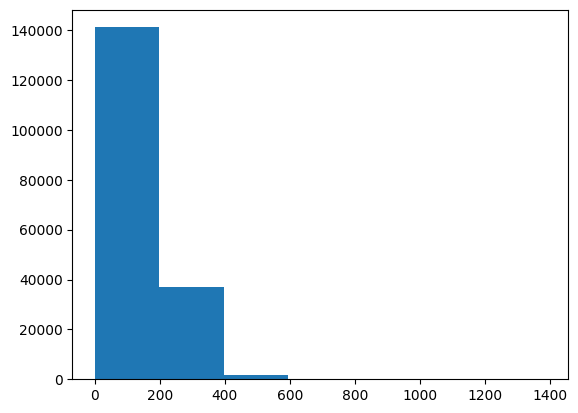

In [53]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c√°c chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [54]:
# T√¨m ƒë·ªô d√†i k√Ω t·ª± chi·∫øm 95% chu·ªói
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [55]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")
char_vectorizer.adapt(train_chars)

In [57]:
# Ki·ªÉm tra ƒë·∫∑c ƒëi·ªÉm c·ªßa character vocabulary
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [58]:
# Ki·ªÉm tra character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
a   t o t a l   o f   @ , @   p a i r s   w e r e   g e n e r a t e d   .

Length of chars: 30

Vectorized chars:
[[ 5  3  7  3  5 12  7 17 14  5  4  8  9 20  2  8  2 18  2  6  2  8  5  3
   2 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [59]:
# T·∫°o char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # s·ªë l∆∞·ª£ng k√Ω t·ª± kh√°c nhau
                              output_dim=25, # k√≠ch th∆∞·ªõc embedding c·ªßa m·ªói k√Ω t·ª± (gi·ªëng nh∆∞ H√¨nh 1 trong https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # kh√¥ng s·ª≠ d·ª•ng mask (ƒëi·ªÅu n√†y s·∫Ω l√†m r·ªëi tung model_5 n·∫øu ƒë∆∞·ª£c ƒë·∫∑t th√†nh True)
                              name="char_embed")

# Ki·ªÉm tra character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
a   t o t a l   o f   @ , @   p a i r s   w e r e   g e n e r a t e d   .

Embedded chars (after vectorization and embedding):
[[[-0.03126861 -0.01315769  0.00817017 ...  0.02906961 -0.00378478
   -0.03753582]
  [ 0.0211532  -0.02300873  0.03908833 ...  0.03382814 -0.00058787
    0.03096091]
  [-0.02970401 -0.02537271 -0.03488623 ...  0.03358329 -0.00417714
    0.02497431]
  ...
  [ 0.00546107 -0.00307852 -0.0322804  ...  0.02093843  0.01128223
   -0.00144489]
  [ 0.00546107 -0.00307852 -0.0322804  ...  0.02093843  0.01128223
   -0.00144489]
  [ 0.00546107 -0.00307852 -0.0322804  ...  0.02093843  0.01128223
   -0.00144489]]]

Character embedding shape: (1, 290, 25)


In [60]:
# T·∫°o Conv1D ch·ªâ ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Bi√™n d·ªãch m√¥ h√¨nh
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [61]:
# T·∫°o char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [62]:
# Kh·ªõp m√¥ h√¨nh ch·ªâ ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 13s 22ms/step - loss: 1.2512 - accuracy: 0.4860 - val_loss: 1.0321 - val_accuracy: 0.5951
Epoch 2/3
562/562 [==============================] - 12s 22ms/step - loss: 0.9978 - accuracy: 0.5996 - val_loss: 0.9294 - val_accuracy: 0.6340
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.9221 - accuracy: 0.6378 - val_loss: 0.8647 - val_accuracy: 0.6652


In [63]:
# ƒê√°nh gi√° model_3 tr√™n to√†n b·ªô validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.8838 - accuracy: 0.6558


[0.8838433623313904, 0.6557990312576294]

In [64]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
# T√≠nh k·∫øt qu·∫£ ch·ªâ c·ªßa c·ªßa m√¥ h√¨nh Conv1D k√Ω t·ª±
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

945/945 [==============================] - 6s 6ms/step


{'accuracy': 65.57990202568516,
 'precision': 0.653212988701653,
 'recall': 0.6557990202568516,
 'f1': 0.6475621980742489}

## Model 4: K·∫øt h·ª£p pretrained token embeddings + character embeddings (hybrid embedding layer)

In [65]:
#1 set the token inputs
token_inputs = layers.Input(shape=[],dtype="string",name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(units=128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

In [66]:
# 2. Thi·∫øt l·∫≠p char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM hi·ªÉn th·ªã trong H√¨nh 1 c·ªßa https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)


In [67]:
# merge
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(units=200,activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes,activation="softmax")(final_dropout)
model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                         outputs=output_layer)

In [68]:
# L·∫•y summary c·ªßa m√¥ h√¨nh token v√† character
model_4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0][0]']   

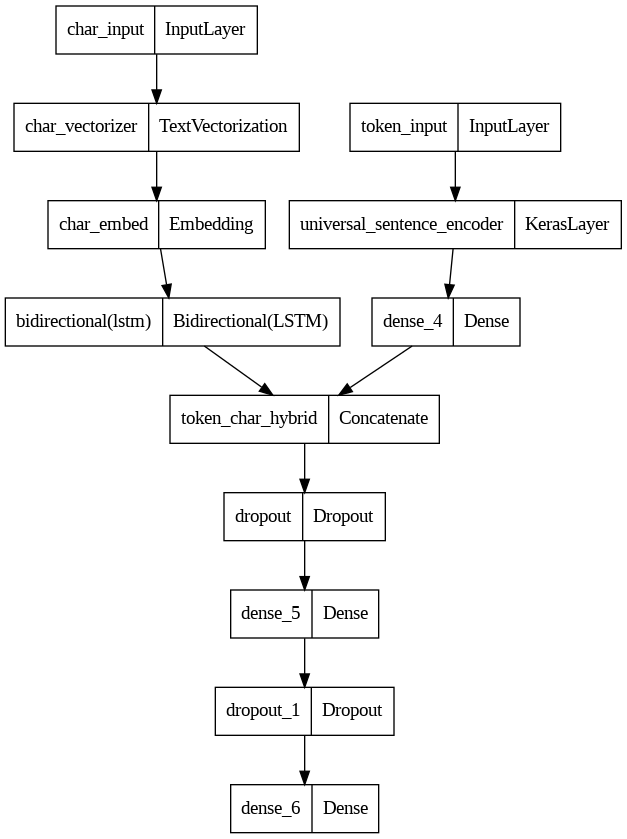

In [69]:
# V·∫Ω m√¥ h√¨nh hybrid token v√† character
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [70]:
# Bi√™n d·ªãch m√¥ h√¨nh token char
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
# K·∫øt h·ª£p chars v√† tokens th√†nh m·ªôt dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # t·∫°o d·ªØ li·ªáu
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # t·∫°o nh√£n
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # k·∫øt h·ª£p d·ªØ li·ªáu v√† nh√£n

# D·ªØ li·ªáu prefetch v√† batch train
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# L·∫∑p l·∫°i c√°c b∆∞·ªõc t∆∞∆°ng t·ª± v·ªõi d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [72]:
# Ki·ªÉm tra training char v√† token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [73]:
# Kh·ªõp m√¥ h√¨nh tr√™n tokens v√† chars
model_4_history = model_4.fit(train_char_token_dataset, # hu·∫•n luy·ªán tr√™n dataset c·ªßa token v√† k√≠ t·ª±
                              steps_per_epoch=int(0.25 * len(train_char_token_dataset)),
                              epochs=5,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.25 * len(val_char_token_dataset)))

Epoch 1/5
1406/1406 [==============================] - 310s 217ms/step - loss: 0.8599 - accuracy: 0.6648 - val_loss: 0.7104 - val_accuracy: 0.7254
Epoch 2/5
1406/1406 [==============================] - 305s 217ms/step - loss: 0.7460 - accuracy: 0.7153 - val_loss: 0.6624 - val_accuracy: 0.7483
Epoch 3/5
1406/1406 [==============================] - 305s 217ms/step - loss: 0.7209 - accuracy: 0.7262 - val_loss: 0.6451 - val_accuracy: 0.7549
Epoch 4/5
1406/1406 [==============================] - 306s 218ms/step - loss: 0.7014 - accuracy: 0.7335 - val_loss: 0.6295 - val_accuracy: 0.7614
Epoch 5/5
   3/1406 [..............................] - ETA: 6:41 - loss: 0.7586 - accuracy: 0.7500

1406/1406 [==============================] - 22s 15ms/step - loss: 0.7586 - accuracy: 0.7500 - val_loss: 0.6306 - val_accuracy: 0.7617


In [74]:
# ƒê√°nh gi√° tr√™n to√†n b·ªô t·∫≠p ki·ªÉm ƒë·ªãnh
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 52s 55ms/step - loss: 0.6257 - accuracy: 0.7615


[0.6257283687591553, 0.7615185976028442]

In [75]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh token-character hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
# Bi·∫øn x√°c su·∫•t d·ª± ƒëo√°n th√†nh l·ªõp d·ª± ƒëo√°n
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
# Nh·∫≠n k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh token-char-hybrid
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

945/945 [==============================] - 53s 55ms/step


{'accuracy': 76.15186018800478,
 'precision': 0.7584687128648332,
 'recall': 0.7615186018800477,
 'f1': 0.757950691054568}

## Model 5: Transfer Learning v·ªõi pretrained token embeddings + character embeddings + positional embeddings


In [76]:
# Ki·ªÉm tra training dataframe
train_df.head()

target                                               text  line_number  \
0  OBJECTIVE  to investigate the efficacy of @ weeks of dail...            0   
1    METHODS  a total of @ patients with primary knee oa wer...            1   
2    METHODS  outcome measures included pain reduction and i...            2   
3    METHODS  pain was assessed using the visual analog pain...            3   
4    METHODS  secondary outcome measures included the wester...            4   

   total_lines  
0           12  
1           12  
2           12  
3           12  
4           12

### T·∫°o positional embedding
Ch√∫ng ta ƒë√£ n√≥i kh√° nhi·ªÅu v·ªÅ positional embedding, h√£y t·∫°o ch√∫ng th√¥i.

V√¨ c√°c c·ªôt `"line_number"` v√† `"total_line"` ·ªü d·∫°ng s·ªë, n√™n ch√∫ng ta c√≥ th·ªÉ truy·ªÅn ch√∫ng v√†o m√¥ h√¨nh

Nh∆∞ng ƒë·ªÉ tr√°nh m√¥ h√¨nh nghƒ© r·∫±ng d√≤ng c√≥ `"line_number"=5` l·ªõn h∆°n nƒÉm l·∫ßn so v·ªõi d√≤ng c√≥ `"line_number"=1`, n√™n ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng m√£ h√≥a one-hot ƒë·ªÉ m√£ h√≥a c√°c ƒë·∫∑c tr∆∞ng `"line_number"` v√† `"total_lines"`.
`tf.one_hot` tr·∫£ v·ªÅ tensor ƒë∆∞·ª£c m√£ h√≥a one-hot. N√≥ ch·∫•p nh·∫≠n m·ªôt m·∫£ng (ho·∫∑c tensor) l√†m ƒë·∫ßu v√†o v√† tham s·ªë `depth` x√°c ƒë·ªãnh chi·ªÅu c·ªßa tensor ƒë∆∞·ª£c tr·∫£ v·ªÅ.

ƒê·ªÉ bi·∫øt n√™n thi·∫øt l·∫≠p tham s·ªë `depth` nh∆∞ th·∫ø n√†o, h√£y ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c·ªôt `"line_number"`.


<Axes: ylabel='Frequency'>

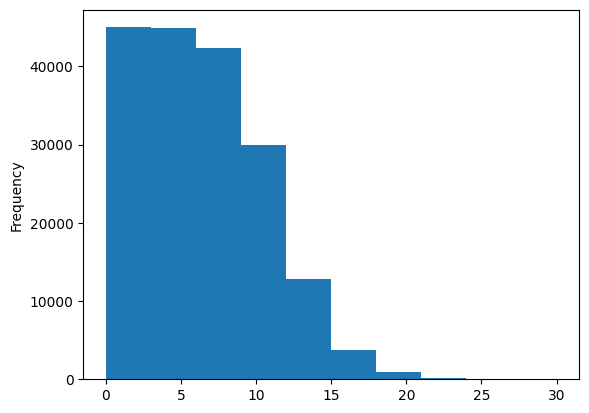

In [77]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c·ªôt "line_number"
train_df.line_number.plot.hist()

In [78]:
# S·ª≠ d·ª•ng TensorFlow ƒë·ªÉ t·∫°o c√°c tensor ƒë∆∞·ª£c m√£ h√≥a one-hot cho c·ªôt "line_number"
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

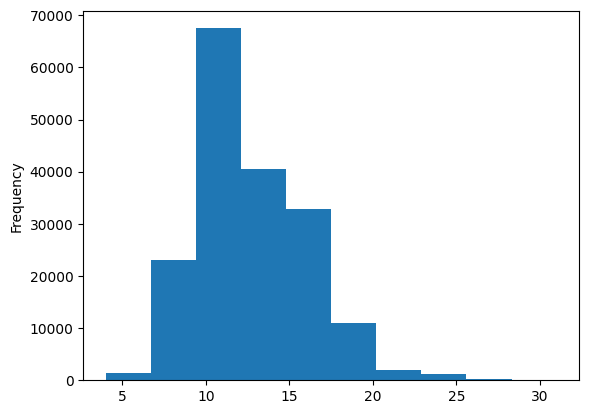

In [79]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa total lines
train_df.total_lines.plot.hist();

In [80]:
 # Ki·ªÉm tra ƒë·ªô bao ph·ªß c·ªßa gi√° tr·ªã "total_lines" 20
np.percentile(train_df.total_lines, 98) # gi√° tr·ªã 20 chi·∫øm 98% m·∫´u

21.0

In [81]:
# S·ª≠ d·ª•ng TensorFlow ƒë·ªÉ t·∫°o c√°c tensor ƒë∆∞·ª£c m√£ h√≥a one-hot cho c·ªôt "total_lines"
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Ki·ªÉm tra shape v√† c√°c m·∫´u c·ªßa total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### X√¢y d·ª±ng m√¥ h√¨nh tribrid embedding


In [82]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_embeddings)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. K·∫øt h·ª£p token embeddings v√† char embeddings th√†nh hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. K·∫øt h·ª£p positional embeddings v·ªõi token v√† char embeddings ƒë√£ k·∫øt h·ª£p th√†nh tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. T·∫°o output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. K·∫øt h·ª£p th√†nh m·ªôt m√¥ h√¨nh
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [83]:
# L·∫•y summary c·ªßa m√¥ h√¨nh token, char v√† positional embedding
model_5.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_embed (Embedding)      (None, 290, 25)              1750      ['char_vectorizer[2][0]'

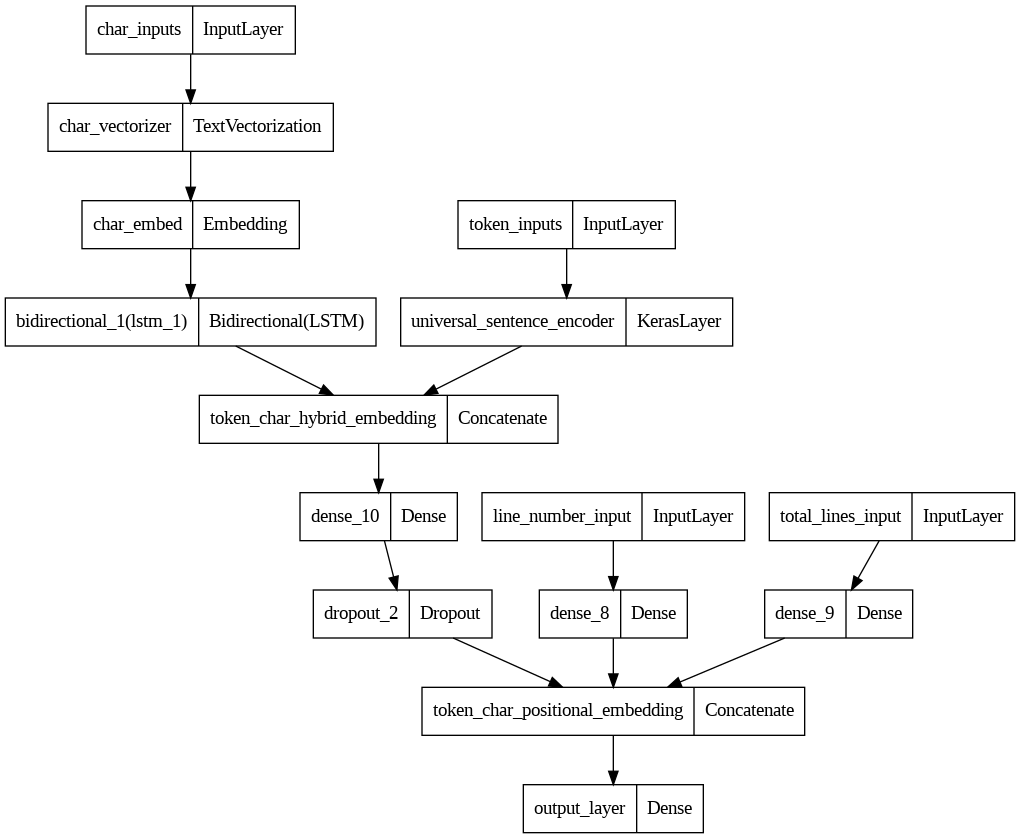

In [84]:
# V·∫Ω m√¥ h√¨nh token, char, positional embedding
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [85]:
# Ki·ªÉm tra nh·ªØng layer n√†o c·ªßa m√¥ h√¨nh c√≥ th·ªÉ hu·∫•n luy·ªán
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7eec4b9be320> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7eebfd175900> True
<keras.src.engine.input_layer.InputLayer object at 0x7eebfaa0aad0> True
<keras.src.layers.core.embedding.Embedding object at 0x7eebfd1b4cd0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7eec52052b00> False
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7eec540eb940> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7eecaaf929e0> True
<keras.src.engine.input_layer.InputLayer object at 0x7eebfaf639d0> True
<keras.src.engine.input_layer.InputLayer object at 0x7eebfc792470> True
<keras.src.layers.core.dense.Dense object at 0x7eec4b663460> True
<keras.src.layers.core.dense.Dense object at 0x7eec540e8d00> True
<keras.src.layers.core.dense.Dense object at 0x7eec4b05e980> True
<keras.src.layers.regularization.dropout.Dropout object at 0x7eec4b6600d0> True
<keras.src.layers.merging.c

In [86]:
# Bi√™n d·ªãch m√¥ h√¨nh token, char, positional embedding
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # th√™m label smoothing (c√°c m·∫´u th·ª±c s·ª± t·ª± tin s·∫Ω l√†m m·ªãn m·ªôt ch√∫t)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:
# T·∫°o training v√† validation datasets (t·∫•t c·∫£ 4 lo·∫°i ƒë·∫ßu v√†o)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # s·ªë d√≤ng
                                                                train_total_lines_one_hot, # t·ªïng s·ªë d√≤ng
                                                                train_sentences, # hu·∫•n luy·ªán token
                                                                train_chars)) # hu·∫•n luy·ªán char
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # hu·∫•n luy·ªán nh√£n
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # k·∫øt h·ª£p d·ªØ li·ªáu v√† nh√£n
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # bi·∫øn th√†nh c√°c batch v√† prefetch m·ªôt c√°ch h·ª£p l√Ω

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # bi·∫øn th√†nh c√°c batch v√† prefetch m·ªôt c√°ch h·ª£p l√Ω

# Ki·ªÉm tra shape ƒë·∫ßu v√†o
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [88]:
# Kh·ªõp m√¥ h√¨nh token, char v√† positional embedding
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=10,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/10
562/562 [==============================] - 143s 243ms/step - loss: 1.0976 - accuracy: 0.7282 - val_loss: 0.9883 - val_accuracy: 0.8005
Epoch 2/10
562/562 [==============================] - 131s 233ms/step - loss: 0.9755 - accuracy: 0.8121 - val_loss: 0.9575 - val_accuracy: 0.8241
Epoch 3/10
562/562 [==============================] - 132s 235ms/step - loss: 0.9607 - accuracy: 0.8183 - val_loss: 0.9500 - val_accuracy: 0.8295
Epoch 4/10
562/562 [==============================] - 135s 241ms/step - loss: 0.9527 - accuracy: 0.8292 - val_loss: 0.9417 - val_accuracy: 0.8285
Epoch 5/10
562/562 [==============================] - 132s 234ms/step - loss: 0.9487 - accuracy: 0.8296 - val_loss: 0.9342 - val_accuracy: 0.8391
Epoch 6/10
562/562 [==============================] - 130s 232ms/step - loss: 0.9522 - accuracy: 0.8250 - val_loss: 0.9305 - val_accuracy: 0.8441
Epoch 7/10
562/562 [==============================] - 136s 242ms/step - loss: 0.9409 - accuracy: 0.8323 - val_loss: 0.9315 -

In [89]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh token-char-positional hybrid
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
# T√≠nh to√°n c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh token-char-positional hybrid
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

945/945 [==============================] - 59s 61ms/step


{'accuracy': 84.71468290745399,
 'precision': 0.8485484050220125,
 'recall': 0.8471468290745399,
 'f1': 0.8438067755376806}

In [90]:
# K·∫øt h·ª£p c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh th√†nh m·ªôt DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

accuracy  precision    recall        f1
baseline                      72.183238   0.718647  0.721832  0.698925
custom_token_embed_conv1d     80.067523   0.800983  0.800675  0.797447
pretrained_token_embed        73.252350   0.728573  0.732524  0.726706
custom_char_embed_conv1d      65.579902   0.653213  0.655799  0.647562
hybrid_char_token_embed       76.151860   0.758469  0.761519  0.757951
tribrid_pos_char_token_embed  84.714683   0.848548  0.847147  0.843807

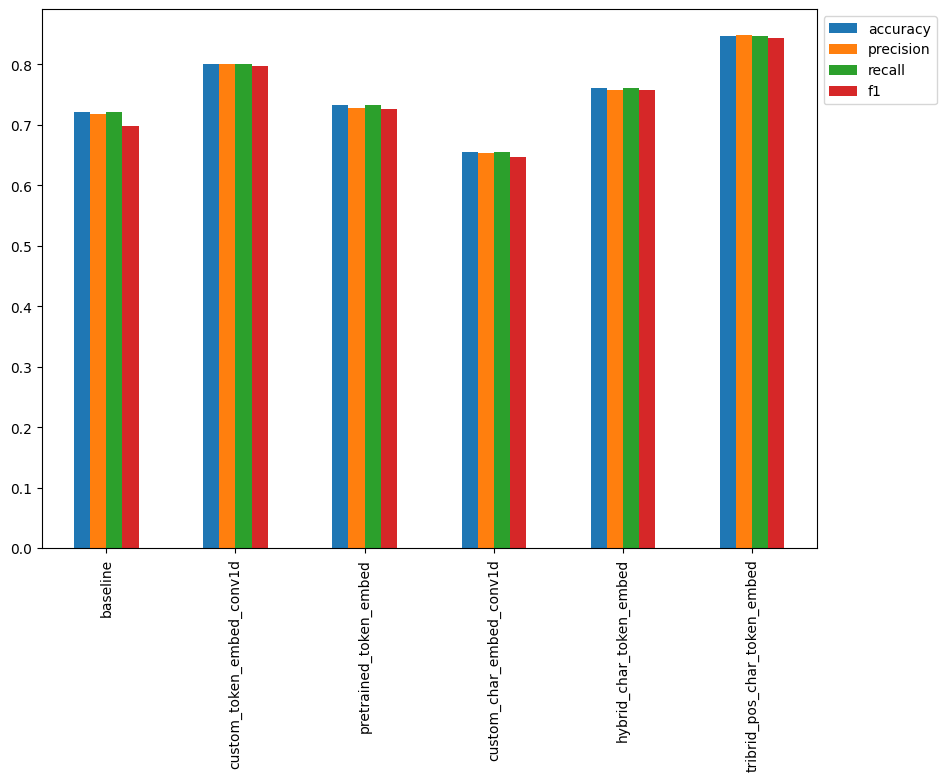

In [91]:
# Gi·∫£m accuracy xu·ªëng c√πng thang ƒëo nh∆∞ c√°c ph√©p ƒëo kh√°c
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# V·∫Ω v√† so s√°nh c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [92]:
# T·∫°o test dataset batch v√† prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Ki·ªÉm tra shapes
test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [93]:
# ƒê∆∞a ra d·ª± ƒëo√°n tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra
test_pred_probs = model_5.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 56s 59ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 4, 4, 1, 4, 0])>

In [94]:
# Ki·ªÉm tra c√°c d·ª± ƒëo√°n c·ªßa loaded model test
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 84.22100547536088,
 'precision': 0.842245612691153,
 'recall': 0.8422100547536088,
 'f1': 0.8388983261247088}

In [95]:
%%time
# L·∫•y danh s√°ch t√™n l·ªõp c·ªßa c√°c d·ª± ƒëo√°n ki·ªÉm tra
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 7.85 s, sys: 27.4 ms, total: 7.87 s
Wall time: 7.9 s


['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESU

In [96]:
# T·∫°o test dataframe ƒë√£ l√†m phong ph√∫ d·ª± ƒëo√°n
test_df["prediction"] = test_pred_classes # t·∫°o c·ªôt v·ªõi t√™n test prediction class
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # l·∫•y x√°c su·∫•t d·ª± ƒëo√°n t·ªëi ƒëa
test_df["correct"] = test_df["prediction"] == test_df["target"] # t·∫°o c·ªôt nh·ªã ph√¢n ƒë·ªÉ bi·∫øt d·ª± ƒëo√°n c√≥ ƒë√∫ng hay kh√¥ng
test_df.head(20)

target                                               text  \
0    BACKGROUND  this study analyzed liver function abnormaliti...   
1       RESULTS  a post hoc analysis was conducted with the use...   
2       RESULTS  liver function tests ( lfts ) were measured at...   
3       RESULTS  survival analyses were used to assess the asso...   
4       RESULTS  the percentage of patients with abnormal lfts ...   
5       RESULTS  when mean hemodynamic profiles were compared i...   
6       RESULTS  multivariable analyses revealed that patients ...   
7   CONCLUSIONS  abnormal lfts are common in the adhf populatio...   
8   CONCLUSIONS  elevated meld-xi scores are associated with po...   
9    BACKGROUND  minimally invasive endovascular aneurysm repai...   
10   BACKGROUND  the aim of this study was to analyse the cost-...   
11      METHODS  resource use was determined from the amsterdam...   
12      METHODS  the analysis was performed from a provider per...   
13      METHODS  all costs were calculated as if all patients h...   
14      RESULTS            a total of @ patients were randomized .   
15      RESULTS  the @-day mortality rate was @ per cent after ...   
16      RESULTS  at @months , the total mortality rate for evar...   
17      RESULTS  the mean cost difference between evar and or w...   
18      RESULTS  the incremental cost-effectiveness ratio per p...   
19      RESULTS  there was no significant difference in quality...   

    line_number  total_lines   prediction  pred_prob  correct  
0             0            9    OBJECTIVE   0.382803    False  
1             1            9      METHODS   0.496849    False  
2             2            9      METHODS   0.890456    False  
3             3            9      METHODS   0.722498    False  
4             4            9      RESULTS   0.784134     True  
5             5            9      RESULTS   0.868227     True  
6             6            9      RESULTS   0.516285     True  
7             7            9  CONCLUSIONS   0.414303     True  
8             8            9      RESULTS   0.492243    False  
9             0           13   BACKGROUND   0.649864     True  
10            1           13    OBJECTIVE   0.487131    False  
11            2           13      METHODS   0.651132     True  
12            3           13      METHODS   0.897046     True  
13            4           13      METHODS   0.564102     True  
14            5           13      RESULTS   0.800213     True  
15            6           13      RESULTS   0.725661     True  
16            7           13      RESULTS   0.917349     True  
17            8           13      RESULTS   0.855594     True  
18            9           13      RESULTS   0.842484     True  
19           10           13      RESULTS   0.850860     True

In [97]:
# T√¨m 100 m·∫´u sai nhi·ªÅu nh·∫•t (l∆∞u √Ω: 100 l√† s·ªë t√πy √Ω, b·∫°n c√≥ th·ªÉ xem qua t·∫•t c·∫£ n·∫øu mu·ªën)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

target                                               text  \
13874  CONCLUSIONS  symptom outcomes will be assessed and estimate...   
8545       METHODS                                 pretest-posttest .   
29294      RESULTS  baseline measures included sociodemographics ,...   
1221       RESULTS  data were collected prospectively for @ months...   
1827   CONCLUSIONS                      nct@ ( clinicaltrials.gov ) .   
...            ...                                                ...   
27814   BACKGROUND  secondary outcomes are patient-rated cosmesis ...   
29320      RESULTS  the patients were divided into @ groups : @ un...   
29313  CONCLUSIONS  the rate of arc definite st in stable patients...   
29835  CONCLUSIONS  by age @ years , subjects remained small and t...   
16841      RESULTS  secondary outcome was cardiovascular hospitali...   

       line_number  total_lines  prediction  pred_prob  correct  
13874            4            7     METHODS   0.966882    False  
8545             1           12  BACKGROUND   0.955011    False  
29294            4           14     METHODS   0.948922    False  
1221             3           14     METHODS   0.938925    False  
1827            18           19  BACKGROUND   0.938857    False  
...            ...          ...         ...        ...      ...  
27814            3           11     METHODS   0.854285    False  
29320            5           14     METHODS   0.854039    False  
29313            9           11     RESULTS   0.853427    False  
29835           10           14     RESULTS   0.850969    False  
16841            4           13     METHODS   0.847294    False  

[100 rows x 7 columns]

## üõ† B√†i t·∫≠p th·ª±c h√†nh
> **L∆∞u √Ω:** C√°c b·∫°n c·∫ßn l√†m ph·∫ßn b√†i t·∫≠p n√†y ƒë·ªÉ chu·∫©n b·ªã cho phi√™n review lab.

1. Hu·∫•n luy·ªán `model_5` tr√™n t·∫•t c·∫£ d·ªØ li·ªáu trong t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán trong nhi·ªÅu epoch cho ƒë·∫øn khi n√≥ ng·ª´ng c·∫£i thi·ªán. V√¨ qu√° tr√¨nh n√†y c√≥ th·ªÉ t·ªën m·ªôt ch√∫t th·ªùi gian, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng:
  * [`tf.keras.callbacks.ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) ƒë·ªÉ ch·ªâ l∆∞u tr·ªçng s·ªë t·ªët nh·∫•t c·ªßa m√¥ h√¨nh.
  * [`tf.keras.callbacks.EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) ƒë·ªÉ d·ª´ng hu·∫•n luy·ªán m√¥ h√¨nh sau khi validation loss ƒë√£ ng·ª´ng c·∫£i thi·ªán trong ~3 epoch.



2. Xem [h∆∞·ªõng d·∫´n c·ªßa Keras v·ªÅ c√°ch s·ª≠ d·ª•ng pretrained GloVe embedding](https://keras.io/examples/nlp/pretrained_word_embeddings/). B·∫°n c√≥ th·ªÉ l√†m cho ƒëi·ªÅu n√†y ho·∫°t ƒë·ªông v·ªõi m·ªôt trong c√°c m√¥ h√¨nh c·ªßa ch√∫ng ta kh√¥ng?
  * G·ª£i √Ω: B·∫°n s·∫Ω mu·ªën k·∫øt h·ª£p n√≥ v·ªõi m·ªôt layer token [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) t√πy ch·ªânh.
  * B·∫°n c√≥ th·ªÉ tinh ch·ªânh c√°c GloVe embedding ho·∫∑c ƒë√≥ng bƒÉng ch√∫ng.

3. H√£y th·ª≠ thay th·∫ø TensorFlow Hub Universal Sentence Encoder pretrained  embedding cho [TensorFlow Hub BERT PubMed expert](https://tfhub.dev/google/experts/bert/pubmed/2) (m√¥ h√¨nh ng√¥n ng·ªØ ƒë∆∞·ª£c hu·∫•n luy·ªán tr∆∞·ªõc tr√™n vƒÉn b·∫£n PubMed). ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi k·∫øt qu·∫£ kh√¥ng?
  * L∆∞u √Ω: Vi·ªác s·ª≠ d·ª•ng BERT PubMed expert pretrained embedding y√™u c·∫ßu th√™m m·ªôt b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω cho c√°c chu·ªói (ƒë∆∞·ª£c tr√¨nh b√†y chi ti·∫øt trong [h∆∞·ªõng d·∫´n c·ªßa TensorFlow Hub](https://tfhub.dev/google/experts/bert/pubmed/2)).
  * M√¥ h√¨nh BERT c√≥ ƒë√°nh b·∫°i c√°c k·∫øt qu·∫£ ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p trong [t√†i li·ªáu n√†y](https://arxiv.org/pdf/1710.06071.pdf) kh√¥ng?

4. ƒêi·ªÅu g√¨ x·∫£y ra n·∫øu ch√∫ng ta h·ª£p nh·∫•t c√°c ƒë·∫∑c tr∆∞ng `line_number` v√† `total_lines` cho t·ª´ng chu·ªói? V√≠ d·ª•: t·∫°o ƒë·∫∑c tr∆∞ng `X_of_Y` thay th·∫ø? ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi ch·∫•t l∆∞·ª£ng m√¥ h√¨nh kh√¥ng?
  * M·ªôt v√≠ d·ª• kh√°c: `line_number=1` v√† `total_lines=11` bi·∫øn th√†nh `line_of_X=1_of_11`.

5. Vi·∫øt m·ªôt h√†m (ho·∫∑c m·ªôt chu·ªói c√°c h√†m) ƒë·ªÉ l·∫•y m·ªôt string abstract m·∫´u, ti·ªÅn x·ª≠ l√Ω n√≥ (theo c√°ch t∆∞∆°ng t·ª± m√† m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán), ƒë∆∞a ra d·ª± ƒëo√°n tr√™n m·ªói chu·ªói trong abstract v√† tr·∫£ v·ªÅ abstract ·ªü ƒë·ªãnh d·∫°ng:
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * ...
    * B·∫°n c√≥ th·ªÉ t√¨m RCT abstract kh√¥ng c√≥ c·∫•u tr√∫c c·ªßa ri√™ng m√¨nh t·ª´ PubMed ho·∫∑c th·ª≠ ph·∫ßn n√†y t·ª´: [*Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection*](https://pubmed.ncbi.nlm.nih.gov/22244707/).

In [99]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint(model_5,
                                   save_weights_only=True,
                                   monitor='val_loss',
                                   mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               mode='min')

# Hu·∫•n luy·ªán model v·ªõi callbacks
history_model_5_new = model_5.fit(
    train_pos_char_token_dataset,  # S·ª≠ d·ª•ng dataset hu·∫•n luy·ªán
    epochs=20,  # S·ªë epoch t·ªëi ƒëa
    validation_data=val_pos_char_token_dataset,  # S·ª≠ d·ª•ng dataset validation
    callbacks=[model_checkpoint, early_stopping]  # S·ª≠ d·ª•ng c√°c callbacks ƒë√£ t·∫°o
)

Epoch 1/20
5627/5627 [==============================] - ETA: 0s - loss: 0.9267 - accuracy: 0.8464

AttributeError: 'Functional' object has no attribute 'format'